In [ ]:
print("Hello World")

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
warnings.filterwarnings('ignore')

In [3]:
DATASET_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/dataset/'
df = pd.read_csv(os.path.join(DATASET_PATH, "preprocessed_data.csv"))

In [4]:
# Split the data into features and target variable
X = df.drop(columns=['Sleep Disorder'])
y = df['Sleep Disorder']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Initialize the SVM classifier
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [13]:
# Print accuracy and classification report
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.75


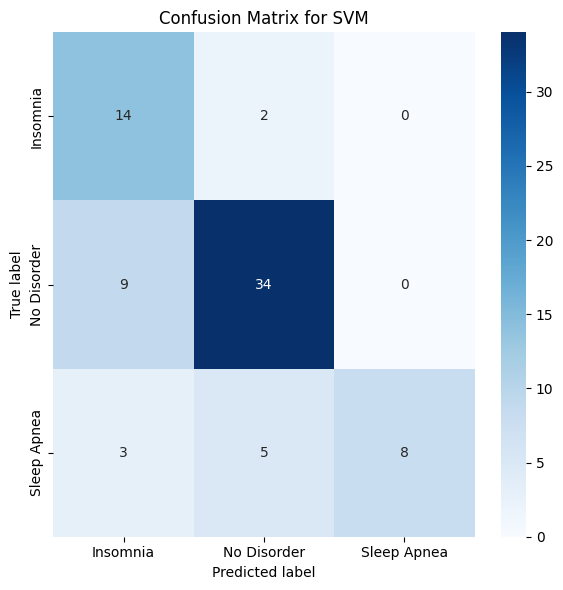

In [14]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [15]:
# Save the model
MODELS_PATH='/Users/lokeshnagasaidarla/Developer/webdev/sleep-health-cardio-prediction/sleep-health-detection/models/'
with open(os.path.join(MODELS_PATH, "svm_model.pkl"), 'wb') as file:
    pickle.dump(svm_model, file)